In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
raw_dataframe = pd.read_csv("pokemon_data_raw.csv", delimiter=",")
cleaned_dataframe = pd.read_csv("pokemon_data_cleaned.csv", delimiter=",")

How many of each type are there?

<BarContainer object of 18 artists>

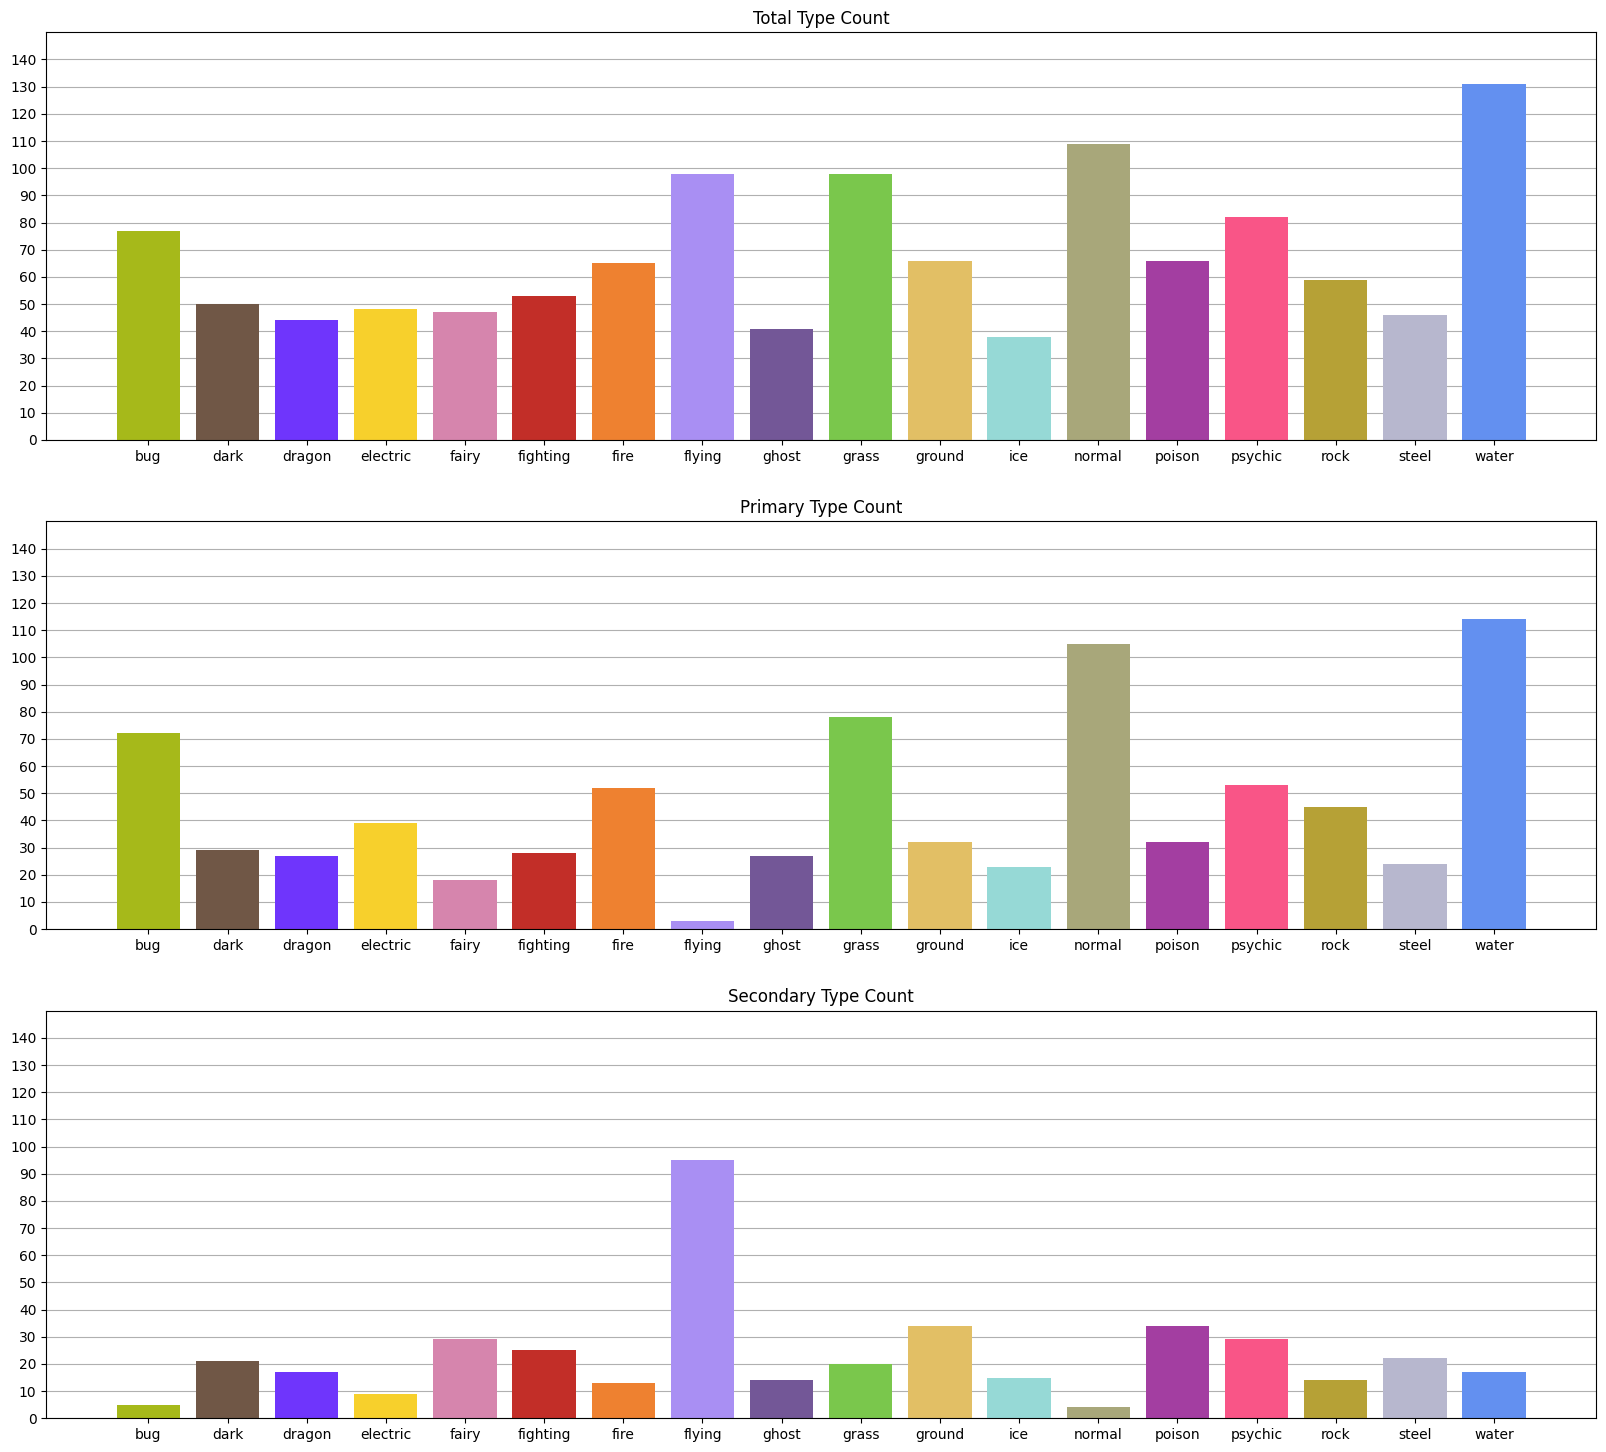

In [215]:
type1_counts = raw_dataframe["type1"].value_counts().to_dict()
type2_counts = raw_dataframe["type2"].value_counts().to_dict()
type_counts = {}

type1_counts = {key: value for key, value in sorted(type1_counts.items())}
type2_counts = {key: value for key, value in sorted(type2_counts.items())}

for key in type1_counts.keys():
    type_counts[key] = type1_counts[key] + type2_counts[key]

# Colours Assigned to each type within Pokemon to make the Graphs look nicer.
type_colours = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0']

plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")


ax1.set_title("Total Type Count")
ax1.bar(range(len(type_counts)), list(type_counts.values()), color=type_colours)

ax2.set_title("Primary Type Count")
ax2.bar(range(len(type1_counts)), list(type1_counts.values()), color=type_colours)

ax3.set_title("Secondary Type Count")
ax3.bar(range(len(type2_counts)), list(type2_counts.values()), color=type_colours)




What do the average base stats look like for each type?

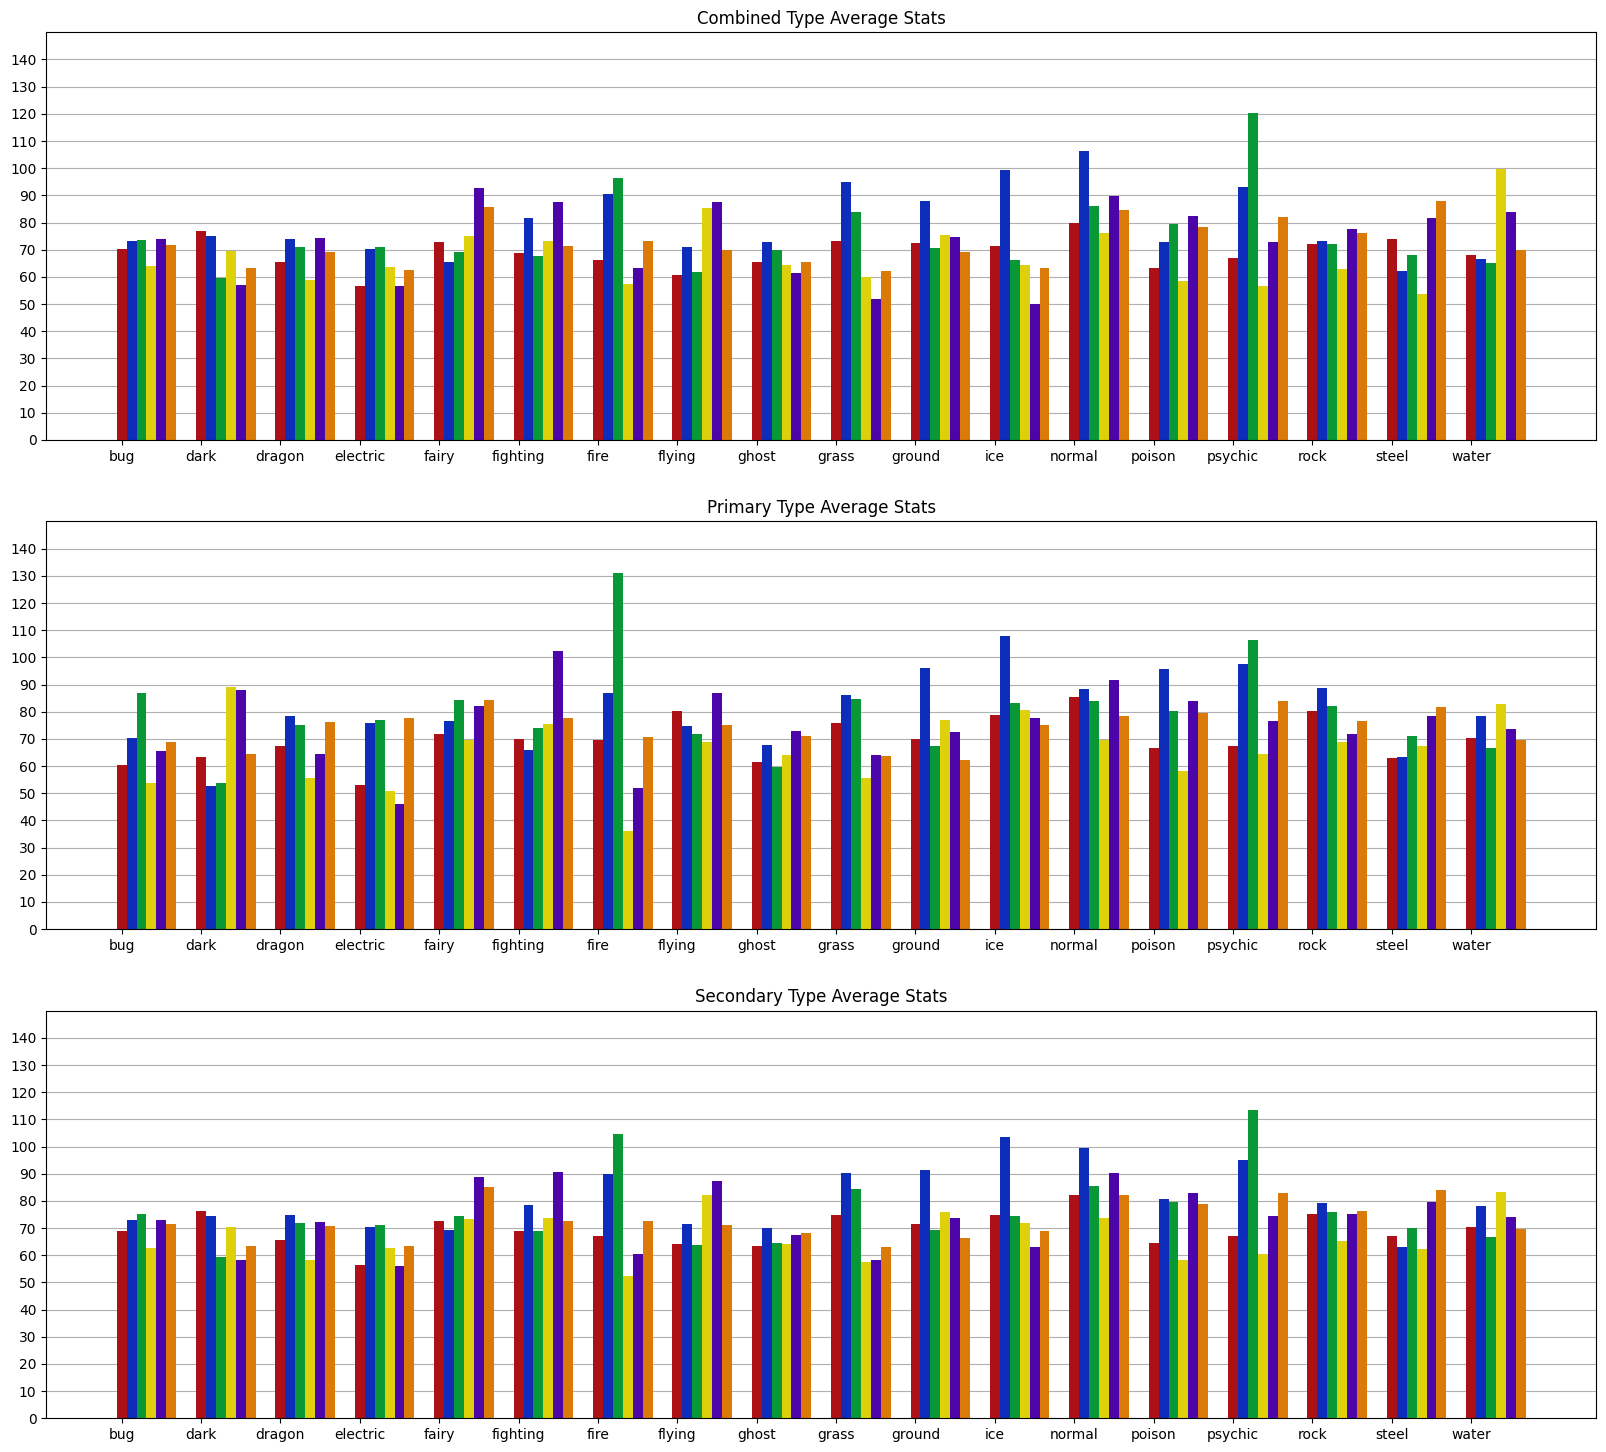

In [277]:
types = raw_dataframe["type1"].value_counts().to_dict().keys()

# Contained stats are hp, attack, defense, speed, sp_attack, sp_defense, total_count
type1_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
type2_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
combined_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}


stats = ["hp", "attack", "defense", "speed", "sp_attack", "sp_defense"]
stats_dataframe = raw_dataframe[["type1", "type2"] + stats]

for index, row in stats_dataframe.iterrows():
    type1 = row["type1"]
    type2 = row["type2"]

    stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]

    type1_total_stats[type1] = [x + y for x,y in zip(type1_total_stats[type1], stat_values)]
    combined_total_stats[type1] = [x + y for x,y in zip(combined_total_stats[type1], stat_values)]

    if type2 not in types: continue

    type2_total_stats[type2] = [x + y for x,y in zip(type2_total_stats[type2], stat_values)]
    combined_total_stats[type2] = [x + y for x,y in zip(combined_total_stats[type2], stat_values)]

type1_average_stats = {}
type2_average_stats = {}
combined_average_stats = {}

for poke_type in types:
    type1_average_stats[poke_type] = [round(stat_total / type1_total_stats[poke_type][6], 2) for stat_total in type1_total_stats[poke_type][:-1]]
    type2_average_stats[poke_type] = [round(stat_total / type2_total_stats[poke_type][6], 2) for stat_total in type2_total_stats[poke_type][:-1]]
    combined_average_stats[poke_type] = [round(stat_total / combined_total_stats[poke_type][6], 2) for stat_total in combined_total_stats[poke_type][:-1]]


plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)
stats_colours = ['#ad1117', '#0d2dba', '#089936', '#ded00b', '#4c05a8', '#db7909']

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")

bar_width = 0.125

ax1.set_title("Combined Type Average Stats")
ax2.set_title("Primary Type Average Stats")
ax3.set_title("Secondary Type Average Stats")


offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type1_average_stats[poke_type][i] for poke_type in types]
    ax1.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type2_average_stats[poke_type][i] for poke_type in types]
    ax2.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [combined_average_stats[poke_type][i] for poke_type in types]
    ax3.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1


[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0, 460.0, 465.0, 470.0, 475.0, 480.0, 485.0, 490.0, 495.0, 500.0, 505.0, 510.0, 515.0, 520.0, 525.0, 530.0, 535.0, 540.0, 545.0, 550.0, 555.0, 560.0, 565.0, 570.0, 575.0, 580.0, 585.0, 590.0, 595.0, 600.0, 605.0, 610.0, 615.0, 620.0, 625.0, 630.0, 635.0, 640.0, 645.0, 650.0, 655.0, 660.0, 665.0, 670.0, 675.0, 680.0, 685.0, 690.0, 695.0, 700.0, 705.0, 710.0, 715.0, 720.0, 725.0,

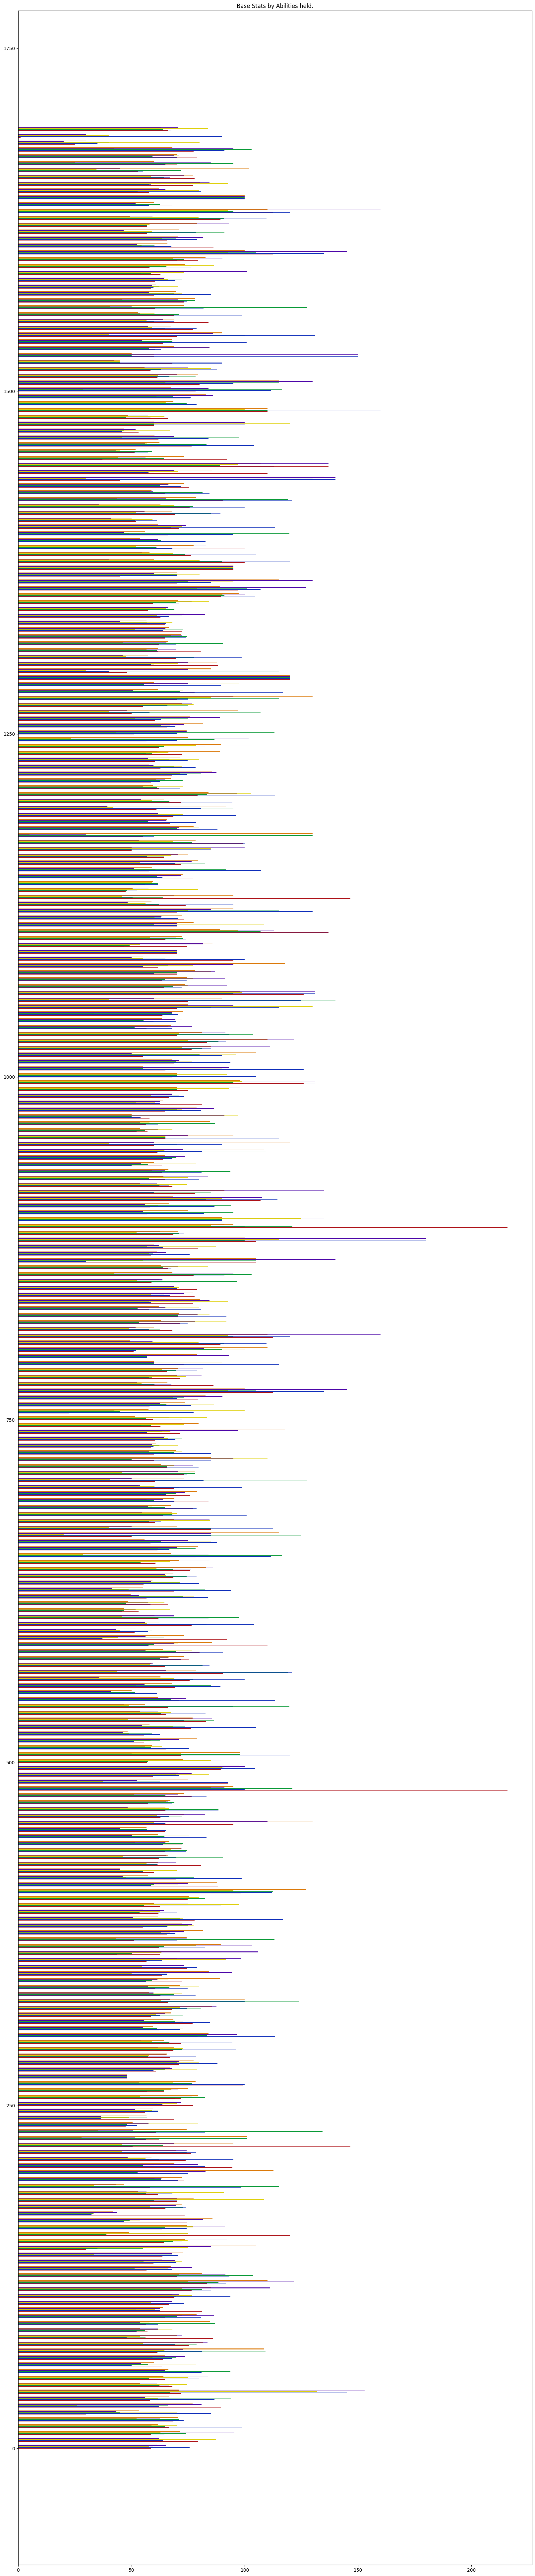

In [ ]:
unique_abilites = set()

for index, row in raw_dataframe.iterrows():
    ability_string = raw_dataframe['abilities'][index]
    ability_string = ability_string.replace("[", "").replace("]", "").replace("'", "")
    ability_list = ability_string.split(",")

    unique_abilites = unique_abilites.union(ability_list)

unique_abilites = sorted(list(unique_abilites))

for i in range(len(unique_abilites)):
    unique_abilites[i] = unique_abilites[i].strip(" ")

ability_total_stats = {ability: [0,0,0,0,0,0,0] for ability in unique_abilites}

for index, row in raw_dataframe.iterrows():

    for ability in unique_abilites:

        if ability in row["abilities"]:
            stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]
            ability_total_stats[ability] = [x + y for x,y in zip(ability_total_stats[ability], stat_values)]

ability_average_stat = {}

for ability in unique_abilites:
    ability_average_stat[ability] = [round(stat_total / ability_total_stats[ability][6], 2) for stat_total in ability_total_stats[ability][:-1]]


# plt.rcParams['figure.figsize'] = [20, 100]
# fig, ax = plt.subplots()

# ax.set_title("Base Stats by Abilities held.")


# bar_width = 0.5

# for i in range(len(stats)):
#     spacing = [(5 * x) + (bar_width * i) for x in range(len(unique_abilites))]
#     print(spacing)

#     values = [ability_average_stat[ability][i] for ability in unique_abilites]

#     ax.barh(spacing, values, bar_width, color=stats_colours[i])